# Primary Objective

The main goal of this project is to analyze the car market and understand how different factors like price,fuel type, brand, and location influence availability and consumer choices. In simple terms, we want to figure out:

Which cars are available where,

How their prices differ,

What options customers really get (fuel, seating, transmission, etc.),

And which brands or models stand out in the market.

# Problem statements:
    1) Identify how on-road car prices vary across brands, model types, and locations to uncover affordability trends in the market.

    2) Analyze the distribution of fuel types (Petrol, Diesel, CNG, Electric) and transmission modes (Manual vsAutomatic)to understand evolving consumer preferences.

    3) Evaluate which brands and models dominate in terms of variety (seating, colors, features) and which ones facehigher discontinuation or unavailability rates.

    4) Assess differences in car availability and pricing across cities to highlight region-specific marketopportunities and gaps.

    5) Examine which segments (SUV, Sedan, Hatchback) and brands offer the widest options to consumers,influencingpurchase decisions.

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Data

In [814]:
df =pd.read_csv('Acko_Drive_Uncleaned.csv')

In [816]:
df

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
0,Mahindra,XUV700,SUV,7 Seater,12 color,Petrol,Automatic,₹24.01 L,Ahmedabad,Unavailable
1,Maruti Suzuki,Wagon R,Hatchback,5 Seater,6 color,Petrol,Manual,₹7.09 L,Ahmedabad,Unavailable
2,Tata,Nexon,SUV,5 Seater,4 color,Diesel,Manual,₹12.73 L,Ahmedabad,Discontinued
3,Hyundai,Creta,SUV,5 Seater,8 color,Petrol,Manual,₹12.70 L,Ahmedabad,Unavailable
4,Maruti Suzuki,XL6,SUV,6 Seater,7 color,CNG,Manual,₹14.59 L,Ahmedabad,Unavailable
...,...,...,...,...,...,...,...,...,...,...
2075,Porsche,911,Coupe,4 Seater,2 color,Petrol,Automatic,₹4.94 Cr,Pune,Unavailable
2076,Porsche,Cayenne,SUV,4 Seater,7 color,Petrol,Automatic,₹1.68 Cr,Pune,Unavailable
2077,Porsche,Cayenne Coupe,Coupe,4 Seater,7 color,Petrol,Automatic,₹1.75 Cr,Pune,Unavailable
2078,Porsche,Macan,SUV,5 Seater,9 color,Petrol,Automatic,₹1.12 Cr,Pune,Unavailable


In [818]:
df.head(10)

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
0,Mahindra,XUV700,SUV,7 Seater,12 color,Petrol,Automatic,₹24.01 L,Ahmedabad,Unavailable
1,Maruti Suzuki,Wagon R,Hatchback,5 Seater,6 color,Petrol,Manual,₹7.09 L,Ahmedabad,Unavailable
2,Tata,Nexon,SUV,5 Seater,4 color,Diesel,Manual,₹12.73 L,Ahmedabad,Discontinued
3,Hyundai,Creta,SUV,5 Seater,8 color,Petrol,Manual,₹12.70 L,Ahmedabad,Unavailable
4,Maruti Suzuki,XL6,SUV,6 Seater,7 color,CNG,Manual,₹14.59 L,Ahmedabad,Unavailable
5,Maruti Suzuki,Invicto,SUV,8 Seater,4 color,Petrol,Automatic,₹29.17 L,Ahmedabad,Unavailable
6,Mahindra,Scorpio-N,SUV,7 Seater,5 color,Diesel,Manual,₹20.82 L,Ahmedabad,Unavailable
7,Mahindra,Bolero Neo,SUV,7 Seater,6 color,Diesel,Manual,₹13.13 L,Ahmedabad,Unavailable
8,Renault,Kwid,Hatchback,5 Seater,5 color,Petrol,Automatic,₹6.76 L,Ahmedabad,Unavailable
9,Toyota,Innova Hycross,SUV,8 Seater,7 color,Petrol,Automatic,₹22.63 L,Ahmedabad,Unavailable


In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2080 non-null   object
 1   Model          2080 non-null   object
 2   Model_Type     2080 non-null   object
 3   Seats          2080 non-null   object
 4   Colors         2080 non-null   object
 5   Fuel_Type      2080 non-null   object
 6   Transmission   2080 non-null   object
 7   On_Road_Price  2080 non-null   object
 8   Location       2080 non-null   object
 9   Availability   2080 non-null   object
dtypes: object(10)
memory usage: 162.6+ KB


In [822]:
df.describe()

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
count,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080
unique,29,176,8,7,16,4,2,1164,13,3
top,Maruti Suzuki,Q3,SUV,5 Seater,5 color,Petrol,Automatic,₹1.28 Cr,Ahmedabad,Unavailable
freq,223,15,1293,1469,398,1352,1279,15,160,1100


In [824]:
df.isna().sum()

Brand            0
Model            0
Model_Type       0
Seats            0
Colors           0
Fuel_Type        0
Transmission     0
On_Road_Price    0
Location         0
Availability     0
dtype: int64

In [826]:
df.duplicated().sum()

64

# DATA CLEANING

In [829]:
df

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
0,Mahindra,XUV700,SUV,7 Seater,12 color,Petrol,Automatic,₹24.01 L,Ahmedabad,Unavailable
1,Maruti Suzuki,Wagon R,Hatchback,5 Seater,6 color,Petrol,Manual,₹7.09 L,Ahmedabad,Unavailable
2,Tata,Nexon,SUV,5 Seater,4 color,Diesel,Manual,₹12.73 L,Ahmedabad,Discontinued
3,Hyundai,Creta,SUV,5 Seater,8 color,Petrol,Manual,₹12.70 L,Ahmedabad,Unavailable
4,Maruti Suzuki,XL6,SUV,6 Seater,7 color,CNG,Manual,₹14.59 L,Ahmedabad,Unavailable
...,...,...,...,...,...,...,...,...,...,...
2075,Porsche,911,Coupe,4 Seater,2 color,Petrol,Automatic,₹4.94 Cr,Pune,Unavailable
2076,Porsche,Cayenne,SUV,4 Seater,7 color,Petrol,Automatic,₹1.68 Cr,Pune,Unavailable
2077,Porsche,Cayenne Coupe,Coupe,4 Seater,7 color,Petrol,Automatic,₹1.75 Cr,Pune,Unavailable
2078,Porsche,Macan,SUV,5 Seater,9 color,Petrol,Automatic,₹1.12 Cr,Pune,Unavailable


In [831]:
df['Seats'] = df['Seats'].str.replace('Seater', '').astype(np.int64)


In [832]:
df['Colors'] = df['Colors'].str.replace('color', '').astype(np.int64)

In [835]:
def convert_price(price):
    if pd.isna(price):
        return None
    price = price.replace('₹', '').strip()
    if 'L' in price:
        return int(float(price.replace('L', '').strip()) * 100000)
    elif 'Cr' in price:
        return int(float(price.replace('Cr', '').strip()) * 10000000)
    else:
        return None

df['On_Road_Price'] = df['On_Road_Price'].apply(convert_price).astype('Int64')

In [836]:
import re
df['Model'] = df['Model'].str.replace(r'\(\s*\d{4}(-\d{4})?\s*\)', '',regex=True).str.strip()

In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2080 non-null   object
 1   Model          2080 non-null   object
 2   Model_Type     2080 non-null   object
 3   Seats          2080 non-null   int64 
 4   Colors         2080 non-null   int64 
 5   Fuel_Type      2080 non-null   object
 6   Transmission   2080 non-null   object
 7   On_Road_Price  2080 non-null   Int64 
 8   Location       2080 non-null   object
 9   Availability   2080 non-null   object
dtypes: Int64(1), int64(2), object(7)
memory usage: 164.7+ KB


In [840]:
df

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
0,Mahindra,XUV700,SUV,7,12,Petrol,Automatic,2401000,Ahmedabad,Unavailable
1,Maruti Suzuki,Wagon R,Hatchback,5,6,Petrol,Manual,709000,Ahmedabad,Unavailable
2,Tata,Nexon,SUV,5,4,Diesel,Manual,1273000,Ahmedabad,Discontinued
3,Hyundai,Creta,SUV,5,8,Petrol,Manual,1270000,Ahmedabad,Unavailable
4,Maruti Suzuki,XL6,SUV,6,7,CNG,Manual,1459000,Ahmedabad,Unavailable
...,...,...,...,...,...,...,...,...,...,...
2075,Porsche,911,Coupe,4,2,Petrol,Automatic,49400000,Pune,Unavailable
2076,Porsche,Cayenne,SUV,4,7,Petrol,Automatic,16800000,Pune,Unavailable
2077,Porsche,Cayenne Coupe,Coupe,4,7,Petrol,Automatic,17500000,Pune,Unavailable
2078,Porsche,Macan,SUV,5,9,Petrol,Automatic,11200000,Pune,Unavailable


In [842]:
df.duplicated().sum()

64

In [844]:
df.drop_duplicates(inplace=True)

In [846]:
df.duplicated().sum()

0

In [848]:
df

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
0,Mahindra,XUV700,SUV,7,12,Petrol,Automatic,2401000,Ahmedabad,Unavailable
1,Maruti Suzuki,Wagon R,Hatchback,5,6,Petrol,Manual,709000,Ahmedabad,Unavailable
2,Tata,Nexon,SUV,5,4,Diesel,Manual,1273000,Ahmedabad,Discontinued
3,Hyundai,Creta,SUV,5,8,Petrol,Manual,1270000,Ahmedabad,Unavailable
4,Maruti Suzuki,XL6,SUV,6,7,CNG,Manual,1459000,Ahmedabad,Unavailable
...,...,...,...,...,...,...,...,...,...,...
2075,Porsche,911,Coupe,4,2,Petrol,Automatic,49400000,Pune,Unavailable
2076,Porsche,Cayenne,SUV,4,7,Petrol,Automatic,16800000,Pune,Unavailable
2077,Porsche,Cayenne Coupe,Coupe,4,7,Petrol,Automatic,17500000,Pune,Unavailable
2078,Porsche,Macan,SUV,5,9,Petrol,Automatic,11200000,Pune,Unavailable


In [850]:
#df4_cleaned = df4_cleaned
#    ~df4_cleaned['Availability'].fillna('').str.strip().str.lower().isin(['unavailable', 'discontinued'])
#]

In [852]:
#df4_cleaned

In [854]:
# As above code is dropping the available row also so i have to go with def function
#to check there are any whitespace or none vlues so to get the write results

In [857]:
def normalize_availability(x):
    # Replace None or NaN with empty string
    if pd.isna(x):
        return ''
    # Normalize: remove ALL non-visible characters, lowercase
    cleaned = str(x).encode('ascii', 'ignore').decode('ascii')  # remove non-ascii
    cleaned = re.sub(r'\s+', '', cleaned).lower()
    return cleaned

df_cleaned = df[~df4['Availability'].apply(normalize_availability).isin(['unavailable', 'discontinued'])]

In [858]:
df_cleaned

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
160,Tata,Nexon,SUV,5,2,Petrol,Manual,989000,Bangalore,Available
161,Tata,Punch,SUV,5,2,Petrol,Manual,772000,Bangalore,Available
162,Maruti Suzuki,Swift,Hatchback,5,4,Petrol,Manual,810000,Bangalore,Available
163,Hyundai,Grand i10 Nios,Hatchback,5,3,Petrol,Manual,742000,Bangalore,Available
164,Hyundai,Aura,Sedan,5,1,CNG,Manual,930000,Bangalore,Available
...,...,...,...,...,...,...,...,...,...,...
1993,Skoda,Kodiaq,SUV,7,9,Petrol,Automatic,5617000,Pune,Available
1994,Tata,Altroz,Hatchback,5,5,CNG,Manual,911999,Pune,Available
1995,Maruti Suzuki,Ertiga,MPV/MUV,7,7,Petrol,Manual,1084000,Pune,Available
1996,Kia,Carens Clavis,SUV,6,7,Petrol,Manual,1357000,Pune,Available


In [871]:
 df_cleaned.sort_index()

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
160,Tata,Nexon,SUV,5,2,Petrol,Manual,989000,Bangalore,Available
161,Tata,Punch,SUV,5,2,Petrol,Manual,772000,Bangalore,Available
162,Maruti Suzuki,Swift,Hatchback,5,4,Petrol,Manual,810000,Bangalore,Available
163,Hyundai,Grand i10 Nios,Hatchback,5,3,Petrol,Manual,742000,Bangalore,Available
164,Hyundai,Aura,Sedan,5,1,CNG,Manual,930000,Bangalore,Available
...,...,...,...,...,...,...,...,...,...,...
1993,Skoda,Kodiaq,SUV,7,9,Petrol,Automatic,5617000,Pune,Available
1994,Tata,Altroz,Hatchback,5,5,CNG,Manual,911999,Pune,Available
1995,Maruti Suzuki,Ertiga,MPV/MUV,7,7,Petrol,Manual,1084000,Pune,Available
1996,Kia,Carens Clavis,SUV,6,7,Petrol,Manual,1357000,Pune,Available


In [893]:
df_cleaned.reset_index(drop=True, inplace=True)

In [895]:
df_cleaned

,Brand,Model,Model_Type,Seats,Colors,Fuel_Type,Transmission,On_Road_Price,Location,Availability
0,Tata,Nexon,SUV,5,2,Petrol,Manual,989000,Bangalore,Available
1,Tata,Punch,SUV,5,2,Petrol,Manual,772000,Bangalore,Available
2,Maruti Suzuki,Swift,Hatchback,5,4,Petrol,Manual,810000,Bangalore,Available
3,Hyundai,Grand i10 Nios,Hatchback,5,3,Petrol,Manual,742000,Bangalore,Available
4,Hyundai,Aura,Sedan,5,1,CNG,Manual,930000,Bangalore,Available
...,...,...,...,...,...,...,...,...,...,...
854,Skoda,Kodiaq,SUV,7,9,Petrol,Automatic,5617000,Pune,Available
855,Tata,Altroz,Hatchback,5,5,CNG,Manual,911999,Pune,Available
856,Maruti Suzuki,Ertiga,MPV/MUV,7,7,Petrol,Manual,1084000,Pune,Available
857,Kia,Carens Clavis,SUV,6,7,Petrol,Manual,1357000,Pune,Available


In [884]:
df_cleaned.to_csv('Acko_Drive_Cleaned.CSV', index=False)

In [4]:
import pandas as pd 
import numpy as np
df5 = pd.read_csv('Acko_Drive_Cleaned.csv')

In [6]:
print(df5['Availability'].unique())

['Available']


# DATA VISUALIZATION

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(palette='tab10')

In [289]:
df5['Brand'].value_counts()

Brand
Maruti Suzuki    179
Hyundai          138
Tata             130
Mahindra         103
MG                62
Toyota            59
Kia               51
Skoda             36
Honda             27
Renault           25
Volkswagen        21
Citroen           20
Nissan             8
Name: count, dtype: int64

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_8472\2143974195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand',data= df5, palette='crest', order=Counts)


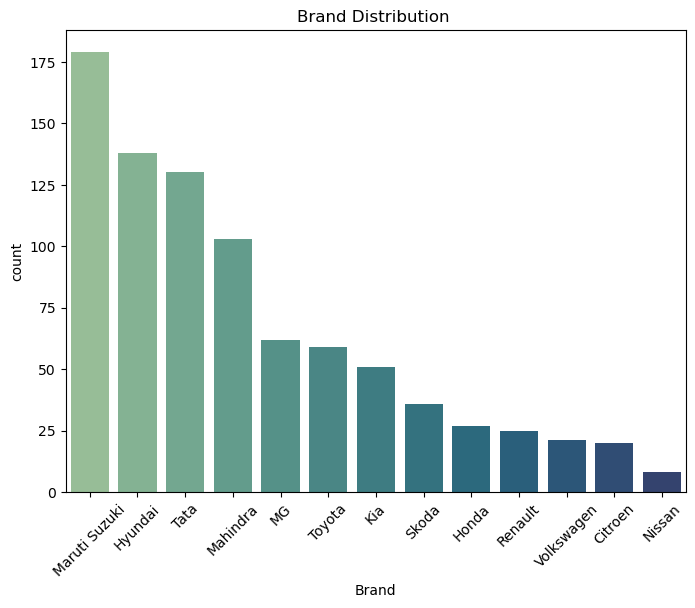

In [273]:
# countplot
# model_name
Counts =df5['Brand'].value_counts().index
plt.figure(figsize=(8,6))
sns.countplot(x='Brand',data= df5, palette='crest', order=Counts)
plt.title('Brand Distribution ')
plt.xticks(rotation = 45)
plt.show()

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_8472\159245258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand',y='On_Road_Price',data=df5, palette='crest')


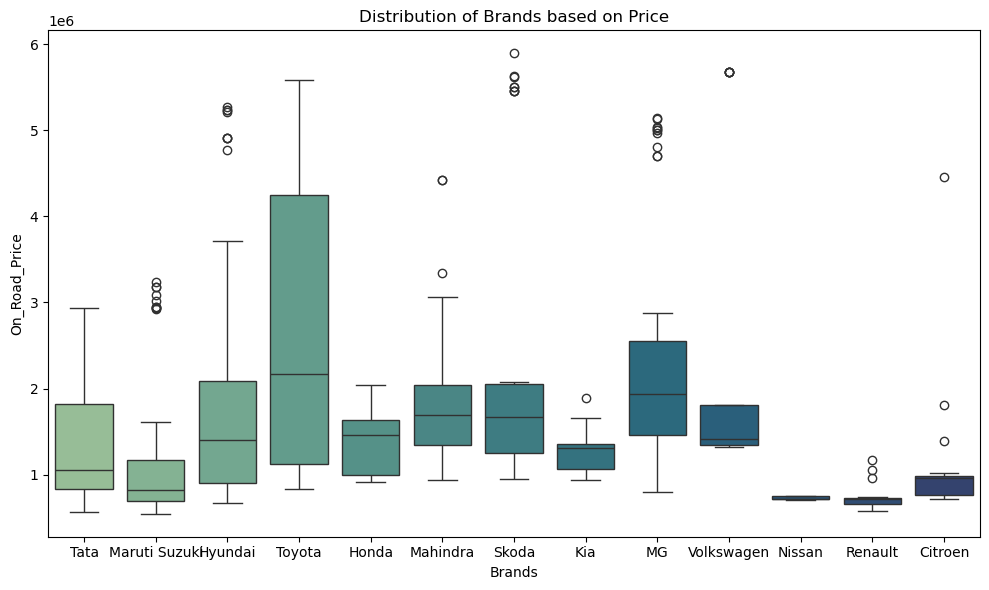

In [253]:
# box plot
import matplotlib.ticker as mtick
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand',y='On_Road_Price',data=df5, palette='crest')
plt.title('Distribution of Brands based on Price')
plt.xlabel('Brands')
plt.tight_layout()
plt.show()

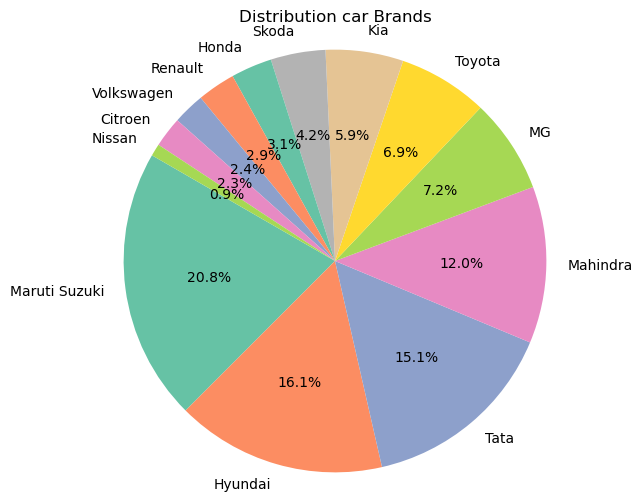

In [39]:
# Pie chart for models
Brand_counts = df5['Brand'].value_counts()
colors = sns.color_palette('Set2', len(Brand_counts))
plt.figure(figsize=(6,6))
plt.pie(Brand_counts,labels= Brand_counts.index, autopct= '%1.1f%%', colors = colors, startangle=150)
plt.title('Distribution car Brands')
plt.axis('equal')
plt.show()

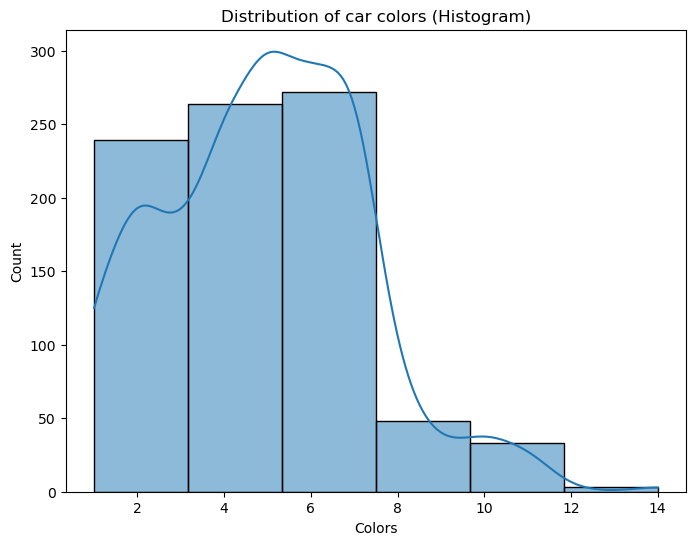

In [79]:
plt.figure(figsize=(8,6))
sns.histplot(df5['Colors'], bins=6, kde=True)
plt.title("Distribution of car colors (Histogram)")
plt.show()

# Bi-variate Visualization

## Numerical vs numerical

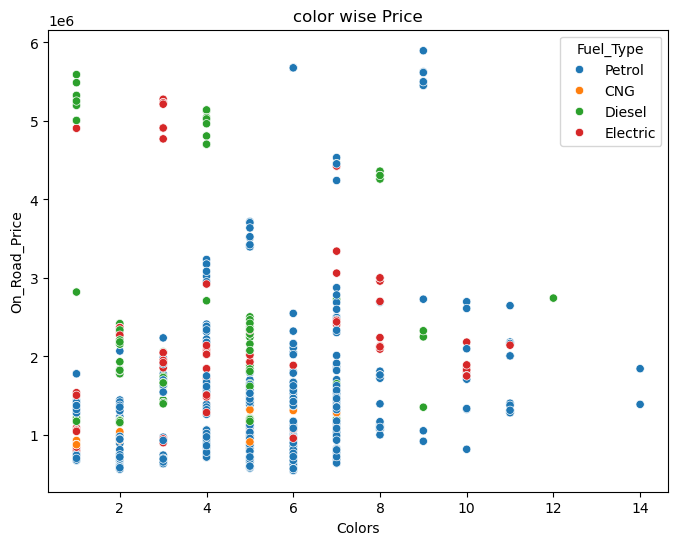

In [81]:
# problem
plt.figure(figsize=(8,6))
sns.scatterplot(x='Colors',y='On_Road_Price',data=df5 , hue ='Fuel_Type')
plt.title('color wise Price')
plt.show()


## Categorical vs Numerical

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_8472\1451349965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Brand',y='On_Road_Price', data=df5, palette = 'husl')


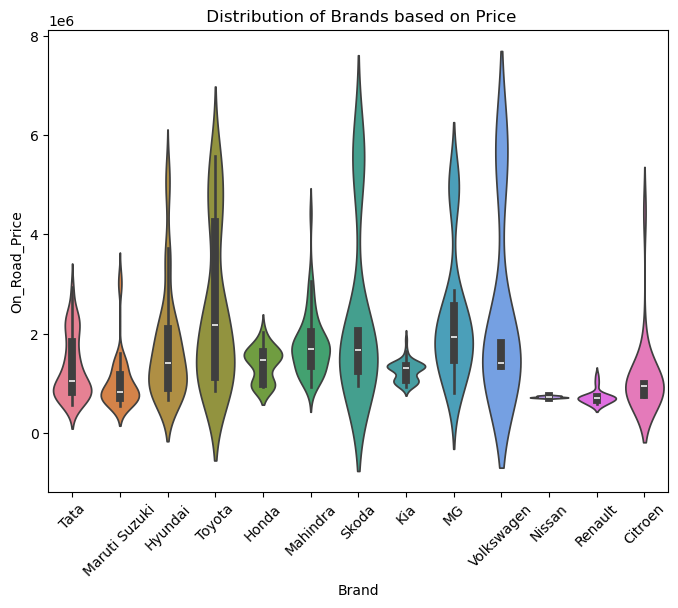

In [112]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Brand',y='On_Road_Price', data=df5, palette = 'husl')
plt.title(' Distribution of Brands based on Price')
plt.xticks(rotation =45)
plt.show()

## Categorical vs Numerical

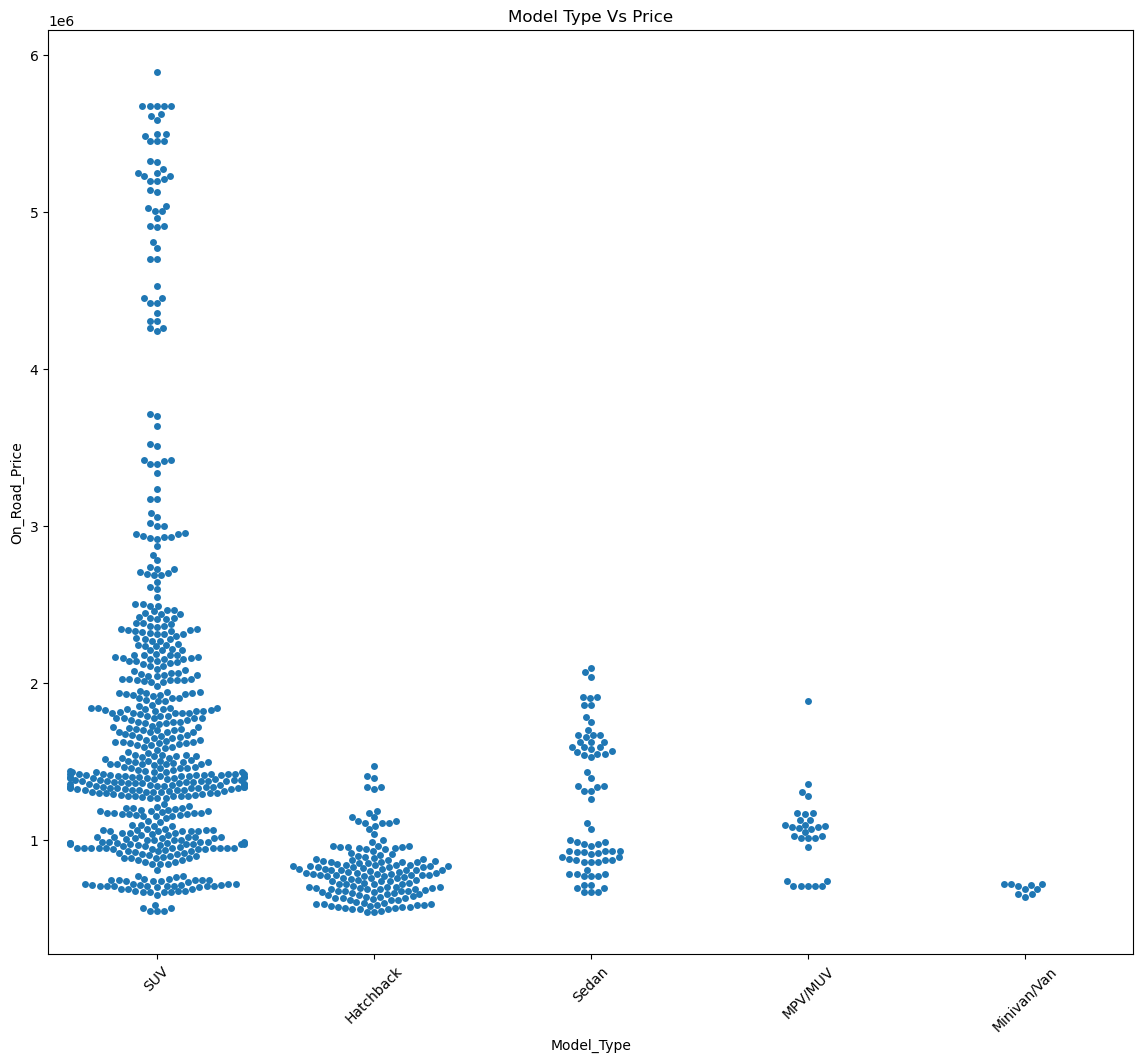

In [1106]:
plt.figure(figsize=(14,12))
sns.swarmplot(x='Model_Type',y='On_Road_Price', data=df5)
plt.title('Model Type Vs Price')
plt.xticks(rotation = 45)
plt.show()

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_8472\3666763255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',y='On_Road_Price', data=df5, order=order, palette = 'husl')


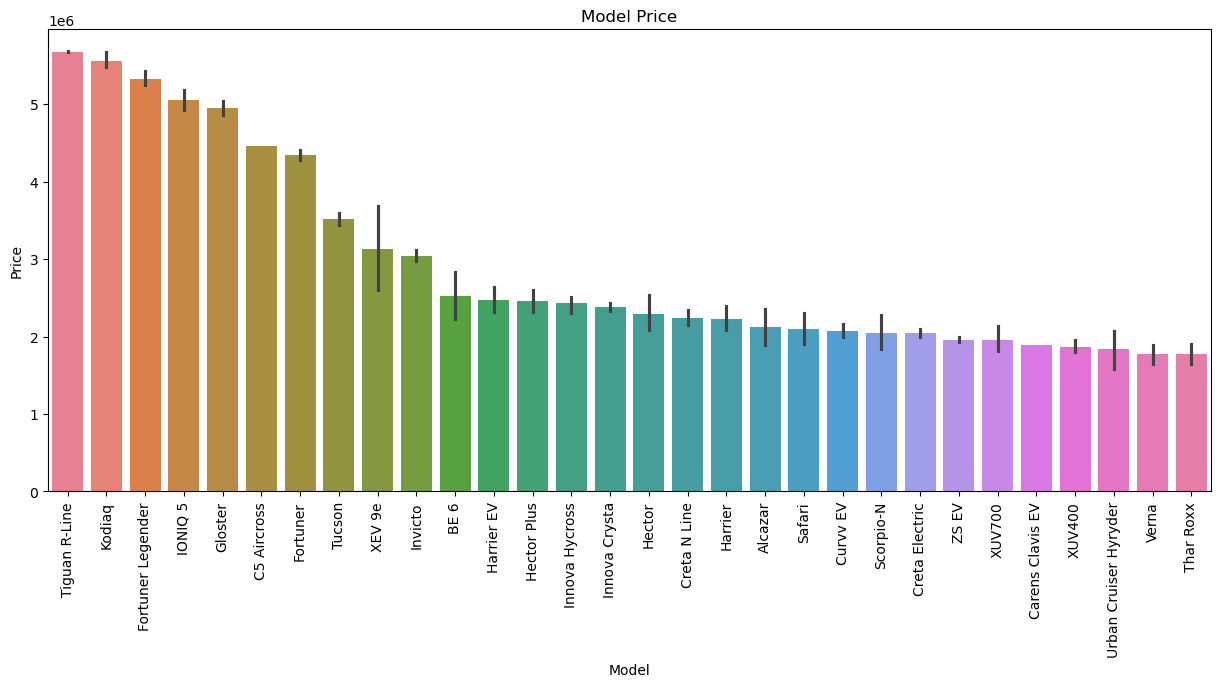

In [315]:
# Model wise Average price of top 30 models
order = df5.groupby('Model')['On_Road_Price'].mean().sort_values(ascending=False).head(30).index
plt.figure(figsize=(15,6))
sns.barplot(x='Model',y='On_Road_Price', data=df5, order=order, palette = 'husl')
plt.title('Model Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation =90)
plt.show()

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_8472\2269782137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type',y='On_Road_Price', data=df5,order=order1,palette = 'crest')


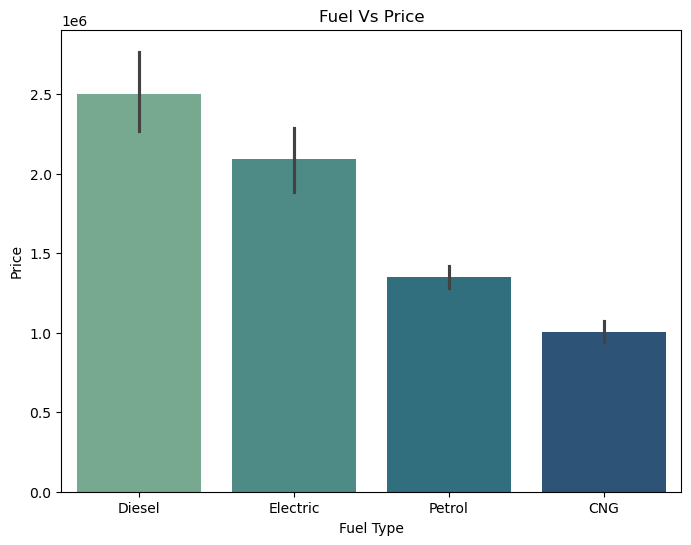

In [132]:
order1 = df5.groupby('Fuel_Type')['On_Road_Price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(8,6))
sns.barplot(x='Fuel_Type',y='On_Road_Price', data=df5,order=order1,palette = 'crest')
plt.title('Fuel Vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_8472\1343011256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',y='Colors', data=df5, palette = 'husl', order=order2)


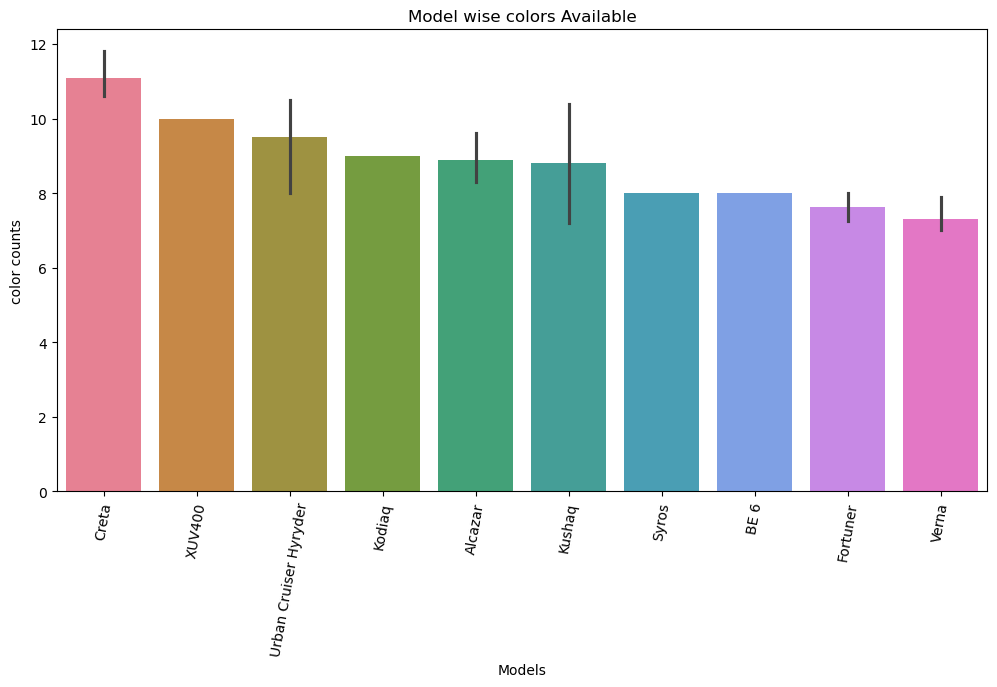

In [307]:
# Model wise Averge no.of colors present
order2 = df5.groupby('Model')['Colors'].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12,6))
sns.barplot(x='Model',y='Colors', data=df5, palette = 'husl', order=order2)
plt.title('Model wise colors Available')
plt.xlabel('Models')
plt.ylabel('color counts')
plt.xticks(rotation = 80)
plt.show()

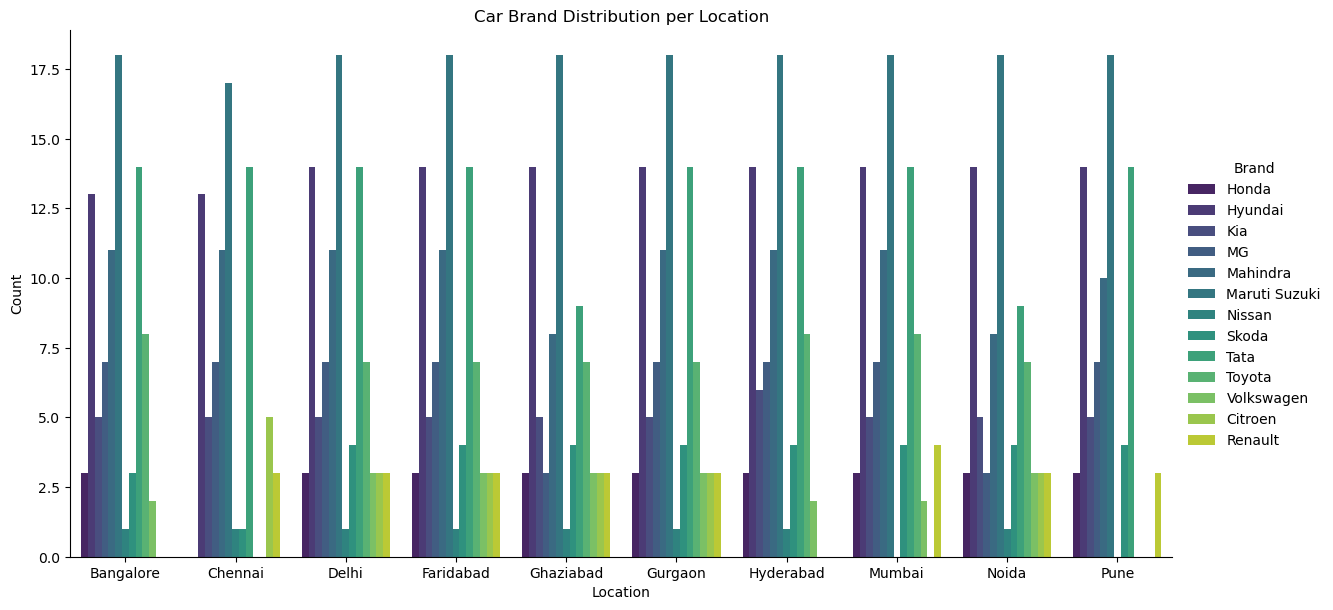

In [178]:
#plt.figure(figsize=(10,8),facecolor='black')
grouped_df = df5.groupby(['Location', 'Brand']).size().reset_index(name='Count')
sns.catplot( data=grouped_df,x="Location",y='Count', hue="Brand", kind="bar",height=6, aspect=2 ,palette = 'viridis')
plt.title('Car Brand Distribution per Location')
#plt.tight_layout()
plt.show()

### categorical vs categorical


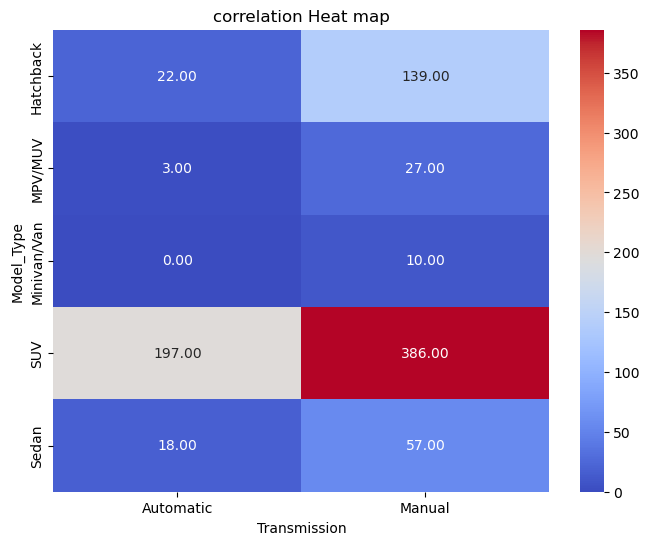

In [184]:
# Heat Map
# the cross_tab is use for categorical columns not for numerical columns
cross_tab = pd.crosstab(df5['Model_Type'], df5['Transmission'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation Heat map")
plt.show() 

## Numerical vs Numerical

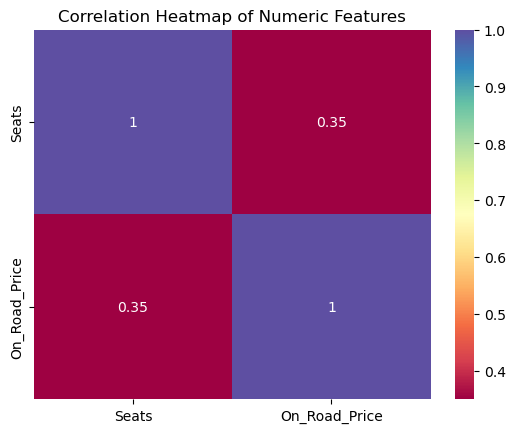

In [1346]:
corr = df5[['Seats', 'On_Road_Price']]  

sns.heatmap(corr.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

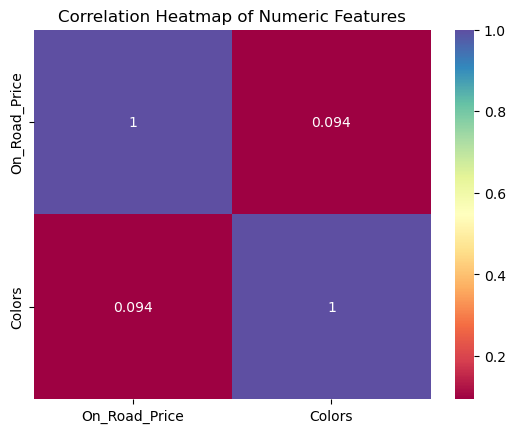

In [188]:
corr = df5[['On_Road_Price', 'Colors']]  

sns.heatmap(corr.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Categorical Vs Numerical

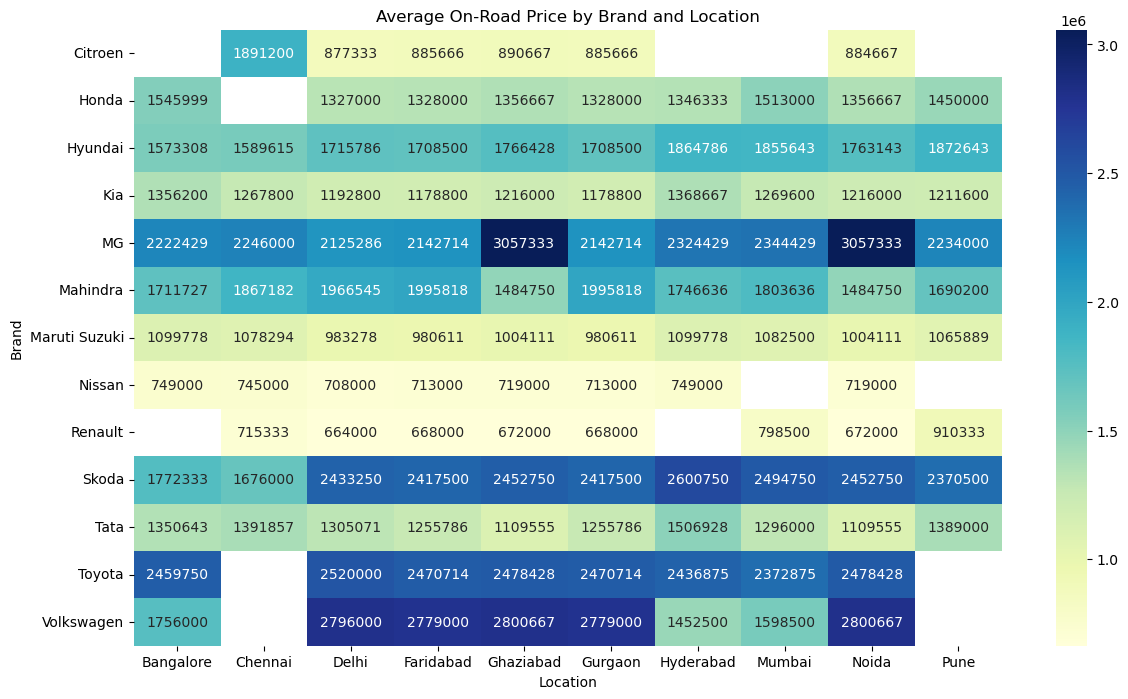

In [1340]:
# pivot_table is used for categorical vs numerical 
plt.figure(figsize=(14, 8))
pivot = df5.pivot_table(index='Brand', columns='Location', values='On_Road_Price', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average On-Road Price by Brand and Location')
plt.show()

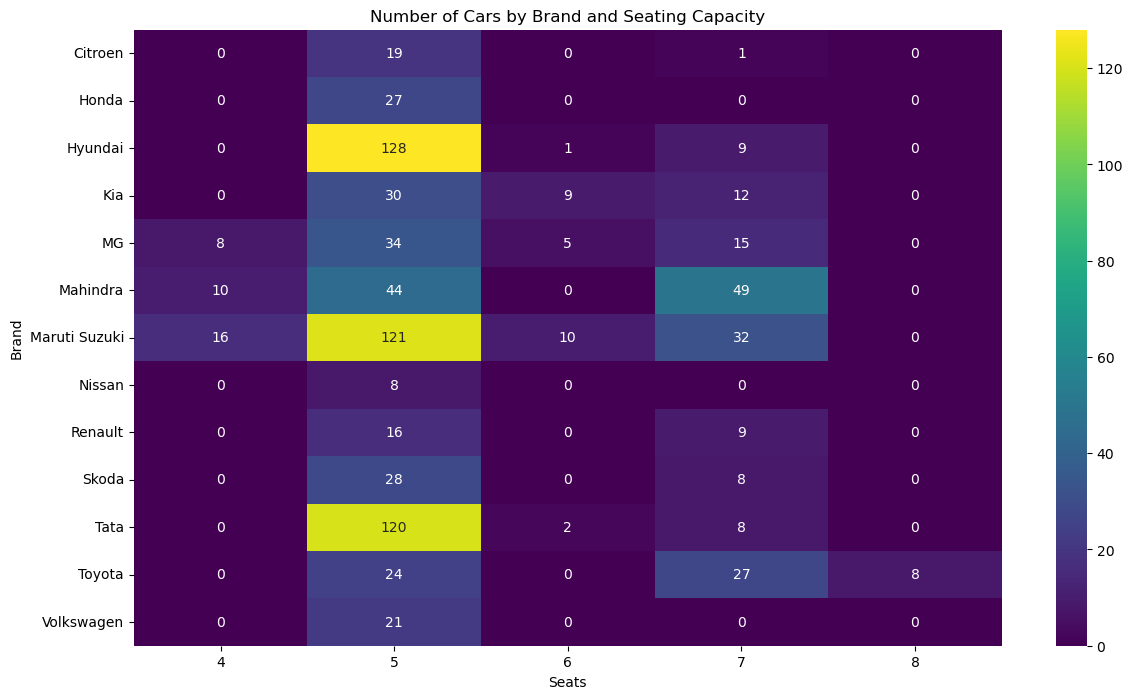

In [1348]:
plt.figure(figsize=(14, 8))
pivot = df5.pivot_table(index='Brand', columns='Seats', aggfunc='size', fill_value=0)
sns.heatmap(pivot, cmap='viridis', annot=True, fmt='d')
plt.title('Number of Cars by Brand and Seating Capacity')
plt.show()

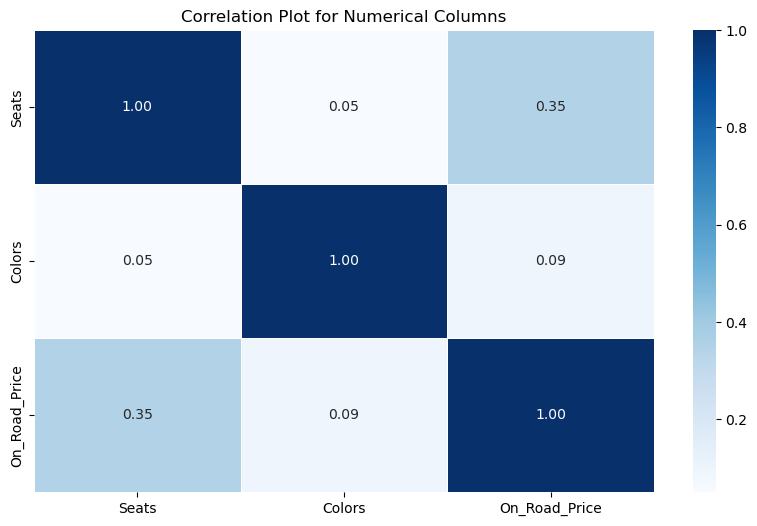

In [355]:
numeric_columns = df5.select_dtypes(include=['float64', 'int64'])

corr = numeric_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Plot for Numerical Columns')

# Display the plot
plt.show()

In [317]:
# for reference
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri